# Evolution of a plot -- better data visualization, one step at a time

This notebook contains the code that accompanies my blog post on http://data.blog. The notebook and the post demonstrate iterative improvement of a single plot. See the blog post for more details. Feel free asking questions and suggesting improvements. See the full post [here](http://wp.me/p7OQzv-7b).

In [1]:
%matplotlib inline
import pandas as pd
import time
from matplotlib import pylab as plt
import scipy.stats as stats
import numpy as np


from IPython.display import display, Image

In [2]:
def gini(list_of_values):
    # copied from here: http://planspace.org/2013/06/21/how-to-calculate-gini-coefficient-from-raw-data-in-python/
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2
    return (fair_area - area) / fair_area

def save_fig(fig=None):
    if fig is None:
        fig = plt.gcf()
    num = save_fig.N +1
    save_fig.N = num
    fn = "%s_%02d.png" % (save_fig.prefix, num)
    fig.savefig(fn)
    print("-==saved %s==-" % fn)
save_fig.prefix = "evolution_of_a_plot"
save_fig.N = 0
!rm -f evolution_of_a_plot_[0-9][0-9].png

In [3]:
tbl = pd.read_csv('data/knesset_data.csv')
tbl_dates = pd.read_csv('data/knesset_data_dates.csv')
tbl = tbl.merge(tbl_dates, on='number')
to_epoch = lambda v: int(time.mktime(time.strptime(str(v), '%Y-%m-%d')))
tbl['date_from_epoch'] = tbl.date_from.apply(to_epoch)
tbl.date_from = pd.to_datetime(tbl.date_from)
tbl.date_to = pd.to_datetime(tbl.date_to)
tbl.head()

,number,party,seats,starting_date,Unnamed: 0,date_from,date_to,date_from_epoch
0,2,"מפא""י",45,8/20/1951,1,1951-07-30,1955-07-26,-581482800
1,2,ציונים כלליים,20,NaN,1,1951-07-30,1955-07-26,-581482800
2,2,"מפ""ם",15,NaN,1,1951-07-30,1955-07-26,-581482800
3,2,הפועל המזרחי,8,NaN,1,1951-07-30,1955-07-26,-581482800
4,2,תנועת החרות,8,NaN,1,1951-07-30,1955-07-26,-581482800


In [4]:
tbl_gini = pd.DataFrame(
    tbl.groupby(
        ['number', 'date_from', 'date_from_epoch']
    )['seats'].apply(gini)).reset_index().rename(
    columns={'seats': 'gini'})

-==saved evolution_of_a_plot_01.png==-


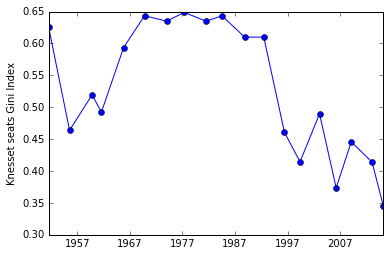

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(tbl_gini.date_from, tbl_gini.gini, '-o')
ax.set_ylabel('Knesset seats Gini Index')
save_fig(fig)

Instant improvement in graph aesthetics is acheived by importing `seaborn`

In [6]:
import seaborn as sns

/Users/boris/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


-==saved evolution_of_a_plot_02.png==-


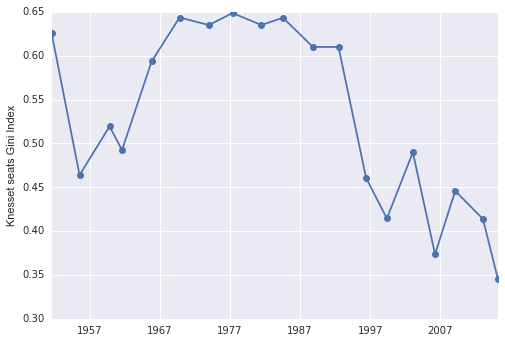

In [7]:
fig, ax = plt.subplots(1, 1)
ax.plot(tbl_gini.date_from, tbl_gini.gini, '-o')
ax.set_ylabel('Knesset seats Gini Index')
save_fig(fig)

-==saved evolution_of_a_plot_03.png==-


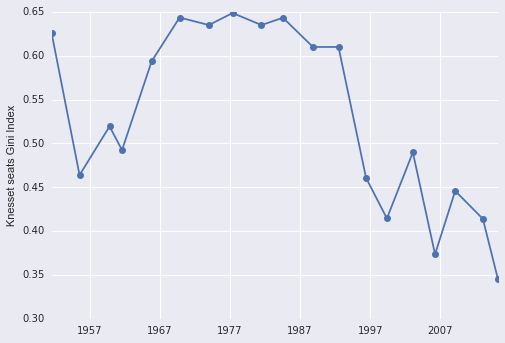

In [8]:
fig, ax = plt.subplots(1, 1)
fig.set_facecolor('#EAEAF2')
ax.plot(tbl_gini.date_from, tbl_gini.gini, '-o')
ax.set_ylabel('Knesset seats Gini Index')
save_fig(fig)

The Gini Index remains unchanged during one Knesset assembly (in theory). Thus, a step plot is more accurate:

-==saved evolution_of_a_plot_04.png==-


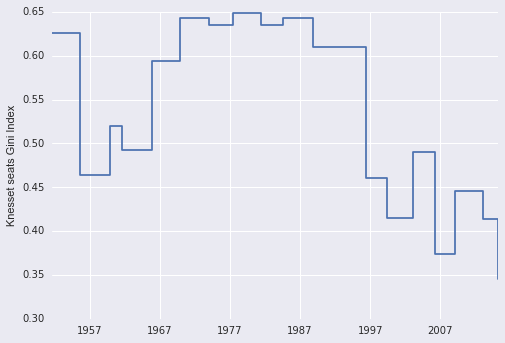

In [9]:
fig, ax = plt.subplots(1, 1)
ax.step(tbl_gini.date_from, tbl_gini.gini, where='post')
fig.set_facecolor('#EAEAF2')
ax.set_ylabel('Knesset seats Gini Index')
save_fig(fig)

Let's change the aspect ratio

-==saved evolution_of_a_plot_05.png==-


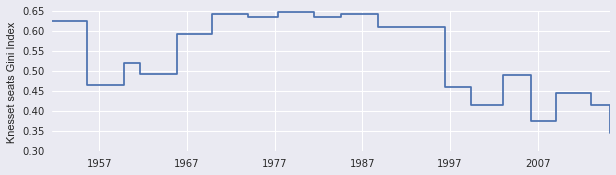

In [10]:
figsize=(10, 2.5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig.set_facecolor('#EAEAF2')
ax.step(tbl_gini.date_from, tbl_gini.gini, where='post')
ax.set_ylabel('Knesset seats Gini Index')
save_fig(fig)

-==saved evolution_of_a_plot_06.png==-


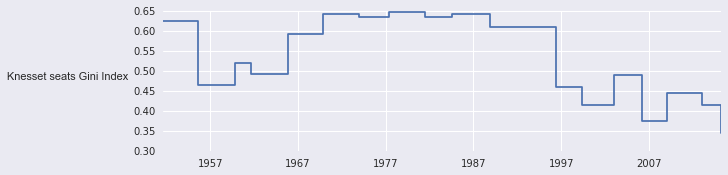

In [11]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig.set_facecolor('#EAEAF2')
ax.step(tbl_gini.date_from, tbl_gini.gini, where='post')
ax.set_ylabel('Knesset seats Gini Index', 
              rotation=0,
              ha='right', # horizontalalignment
             )
save_fig(fig)

In [12]:
def fewer_ticks(ax, xy='xy', nticks=3, decimals=None):
    for letter in list(xy):
        if letter.lower() == 'x':
            getlim = ax.get_xlim
            setticks = ax.set_xticks
        elif letter.lower() == 'y':
            getlim = ax.get_ylim
            setticks = ax.set_yticks
        else:
            raise RuntimeError()
        lm = getlim()
        ticks = np.linspace(lm[0], lm[1], nticks)
        if decimals is not None:
            ticks = np.round(ticks, decimals)
        setticks(ticks)

-==saved evolution_of_a_plot_07.png==-


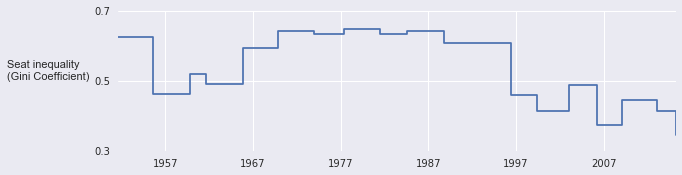

In [13]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig.set_facecolor('#EAEAF2')
ax.step(tbl_gini.date_from, tbl_gini.gini, where='post')
ax.set_ylabel('Seat inequality\n(Gini Coefficient)', 
              rotation=0,
              ha='right', # horizontalalignment
              ma='left', # multiline alignment
             )

ax.set_ylim(0.3, .7)
fewer_ticks(ax, xy='y', decimals=1, nticks=3) # compare  nticks=2 vs 3
save_fig(fig)

-==saved evolution_of_a_plot_08.png==-


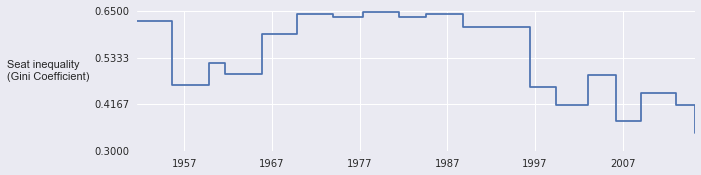

In [14]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig.set_facecolor('#EAEAF2')
ax.step(tbl_gini.date_from, tbl_gini.gini,where='post')
ax.set_ylabel('Seat inequality\n(Gini Coefficient)', 
              rotation=0,
              ha='right', # horizontalalignment
              ma='left', # multiline alignment
             )

fewer_ticks(ax, 'y', nticks=4) 
save_fig(fig)

-==saved evolution_of_a_plot_09.png==-


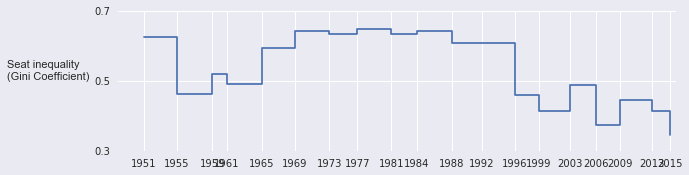

In [15]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig.set_facecolor('#EAEAF2')
ax.step(tbl_gini.date_from, tbl_gini.gini, where='post')
ax.set_ylabel('Seat inequality\n(Gini Coefficient)', 
              rotation=0,
              ha='right', # horizontalalignment
              ma='left', # multiline alignment
             )

ax.set_ylim(0.3, 0.7)
ax.set_xlim(pd.to_datetime('1948-05-14'), pd.to_datetime('2015-11-23'))


fewer_ticks(ax, 'y')
ax.set_xticks([t.to_datetime() for t in tbl_gini.date_from])
save_fig(fig)

-==saved evolution_of_a_plot_10.png==-


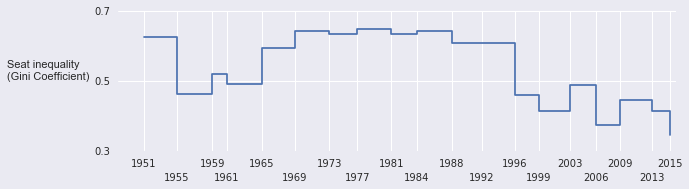

In [16]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig.set_facecolor('#EAEAF2')
ax.step(tbl_gini.date_from, tbl_gini.gini, where='post')
ax.set_ylabel('Seat inequality\n(Gini Coefficient)', 
              rotation=0,
              ha='right', # horizontalalignment
              ma='left', # multiline alignment
             )


ax.set_ylim(0.3, 0.7)
ax.set_xlim(pd.to_datetime('1948-05-14'), pd.to_datetime('2015-11-23'))


fewer_ticks(ax, 'y')
ax.set_xticks([t.to_datetime() for t in tbl_gini.date_from])
for i, l in enumerate(ax.get_xticklabels()):
    if i % 2:
        l.set_y( - 0.1)
save_fig(fig)

In [17]:
yr = tbl_gini.date_from.apply(lambda x: x.year)

sx = (yr >= 1996) & (yr <= 2003)
x = tbl_gini.loc[sx].date_from.values
x = [x[0], x[0], x[1], x[1], x[2]]

sy = (yr >= 1992) & (yr <= 1999)
y = tbl_gini.loc[sy].gini.values
y = [y[0], y[1], y[1], y[2], y[2]]

-==saved evolution_of_a_plot_11.png==-


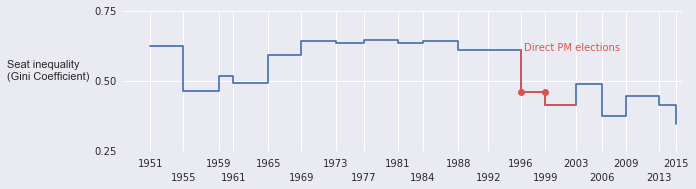

In [18]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.step(tbl_gini.date_from, tbl_gini.gini, where='post')
ax.set_ylabel('Seat inequality\n(Gini Coefficient)', 
              rotation=0,
              ha='right', # horizontalalignment
              ma='left', # multiline alignment
             )


ax.set_ylim(0.3, 0.7)
ax.set_xlim(pd.to_datetime('1948-05-14'), pd.to_datetime('2015-11-23'))

ax.set_ylim(0.25, 0.75)
fewer_ticks(ax, 'y')
ax.set_xticks([t.to_datetime() for t in tbl_gini.date_from])


for i, l in enumerate(ax.get_xticklabels()):
    if i % 2:
        l.set_y( - 0.1)


ax.plot(x, y, '-', color=sns.xkcd_rgb['pale red'])
ax.plot([x[1], x[2]], [y[1], y[2]], 'o', color=sns.xkcd_rgb['pale red'])
ax.text(pd.to_datetime('1996-11'),
        0.61,
        'Direct PM elections',
        ha='left',
        color=sns.xkcd_rgb['pale red'],
       )
fig.set_facecolor('#EAEAF2')
save_fig(fig)



-==saved evolution_of_a_plot_12.png==-


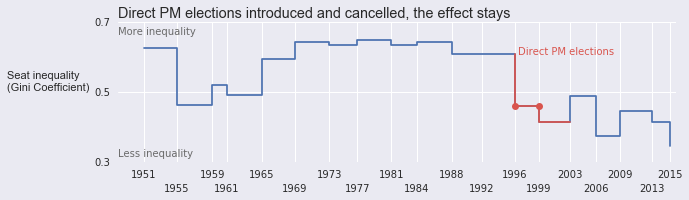

In [19]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig.set_facecolor('#EAEAF2')
ax.step(tbl_gini.date_from, tbl_gini.gini, where='post')
ax.set_ylabel('Seat inequality\n(Gini Coefficient)', 
              rotation=0,
              ha='right', # horizontalalignment
              ma='left', # multiline alignment
             )


ax.set_ylim(0.3, 0.7)
ax.set_xlim(pd.to_datetime('1948-05-14'), pd.to_datetime('2015-11-23'))

fewer_ticks(ax, 'y')
ax.set_xticks([t.to_datetime() for t in tbl_gini.date_from])
ax.text(0, # text X
        0.90, # Y
        'More inequality',
        color='dimgray',
        va='bottom',
        transform=ax.transAxes, # XY coordinates are relative to the plot
       
       )
ax.text(0, 
        0.1,
        'Less inequality',
        color='dimgray', 
        va='top',
        transform=ax.transAxes
       )

for i, l in enumerate(ax.get_xticklabels()):
    if i % 2:
        l.set_y( - 0.1)


ax.plot(x, y, '-', color=sns.xkcd_rgb['pale red'])
ax.plot([x[1], x[2]], [y[1], y[2]], 'o', color=sns.xkcd_rgb['pale red'])
ax.text(pd.to_datetime('1996-11'),
        0.61,
        'Direct PM elections',
        ha='left',
        color=sns.xkcd_rgb['pale red'],
       )

ax.set_title('Direct PM elections introduced and cancelled, the effect stays',
             fontsize='x-large',
             x=0, ha='left',
            )
save_fig(fig)